In [81]:
# DATA471n - Assginment 4
#  Fahad Bukhari 

# Part 1:  EDA

### Import Library 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

### Reading dataset

Load two dataset CSV files into pandas DataFrames:
- (train-1.csv) for training and exvaluation the model 
- (test-1.csv) for testing model geeralization on unseen dta  

In [122]:
# Load the dataset
train_data = pd.read_csv('train-1.csv')
test_data = pd.read_csv('test-1.csv')

In [ ]:
# View the first few rows of the training data
# print(train_data.head())

### Data Discreptive: 

- ##### Data Structure: 
    - Check data type for each variables: 
    - Dataset consist of ........ columns
    - Categorical Columns: .........
    - Numerical Columns: ........

In [88]:
# Check the info and data types
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6117 entries, 0 to 6116
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          6117 non-null   object 
 1   year_of_observation  6117 non-null   int64  
 2   insured_period       6117 non-null   float64
 3   residential          6117 non-null   int64  
 4   building_painted     6117 non-null   object 
 5   building_fenced      6117 non-null   object 
 6   garden               6110 non-null   object 
 7   settlement           6117 non-null   object 
 8   building_dimension   6015 non-null   float64
 9   building_type        6117 non-null   int64  
 10  date_of_occupancy    5658 non-null   float64
 11  number_of_windows    6117 non-null   object 
 12  geo_code             6019 non-null   object 
 13  claim                6117 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 669.2+ KB
None


- #### Convert Wrong Data Type:
    - number_of_windows: convert to int64, and remove wringe format(>=10 , .)
    - date_of_occupancy: convert to time serice
    - geo_code:  convert to float, and drop data with wrong format (2B353)

In [93]:
import pandas as pd

# Assuming train_data is a pandas DataFrame

# Function to check if a value can be converted to an integer
def is_integer(value):
    try:
        int(value)
        return True
    except ValueError:
        return False

# Function to check if a value can be converted to a float
def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Remove rows with invalid data in the 'number_of_windows' column
train_data = train_data[train_data['number_of_windows'].apply(is_integer)]

# Convert the 'number_of_windows' column to an integer data type
train_data['number_of_windows'] = train_data['number_of_windows'].astype(int)

# Convert the 'date_of_occupancy' column to a datetime data type
train_data['date_of_occupancy'] = pd.to_datetime(train_data['date_of_occupancy'], errors='coerce')

# Remove rows with invalid data in the 'geo_code' column
train_data = train_data[train_data['geo_code'].apply(is_float)]

### Check Imbalance: 
Check class imbalabnce in target variable, by count the number of samples for each target class


In [94]:
import numpy as np
for c in np.unique(train_data['claim']):
    print('{%d : %d}' % (c, sum(train_data['claim']==c)))

{0 : 2160}
{1 : 722}


- As you can see in the result, there 4698 with class 0. while class 1 account 1419 instances.
- Thus, the dataset has imbalance issue.

### Descreptive:

- Check data range for each variables.

In [95]:
# Summary statistics for numerical columns
print(train_data.describe())

       year_of_observation  insured_period  residential  building_dimension  \
count          2882.000000     2882.000000  2882.000000         2882.000000   
mean           2013.379251        0.921866     0.354268         2059.299792   
std               1.080334        0.219290     0.478374         2313.554544   
min            2012.000000        0.000000     0.000000           85.000000   
25%            2012.000000        1.000000     0.000000          600.000000   
50%            2013.000000        1.000000     0.000000         1250.000000   
75%            2014.000000        1.000000     1.000000         2649.000000   
max            2015.000000        1.000000     1.000000        20940.000000   

       building_type  number_of_windows        claim  
count    2882.000000        2882.000000  2882.000000  
mean        2.202290           4.214087     0.250520  
std         0.946882           1.647620     0.433388  
min         1.000000           1.000000     0.000000  
25%         2

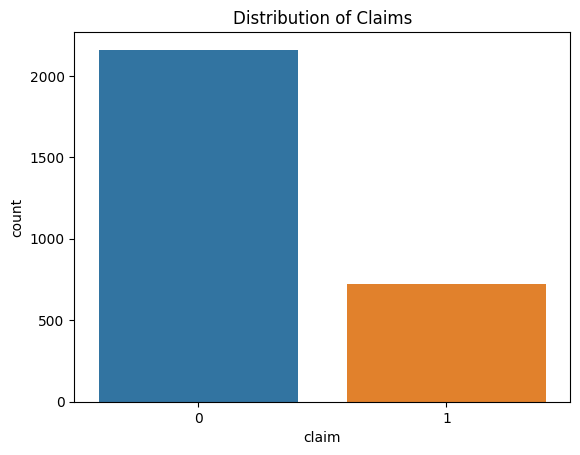

In [83]:
# Plot the distribution of the target variable
sns.countplot(x='claim', data=train_data)
plt.title('Distribution of Claims')
plt.show()

- Convert categorical columns

In [68]:
# Convert categorical columns to category type
categorical_columns = ['residential', 'building_painted', 'building_fenced', 'garden', 'settlement', 'building_type']

for col in categorical_columns:
    train_data[col] = train_data[col].astype('category')

# Convert 'geo_code' to categorical if it's categorical
# train_data['geo_code'] = train_data['geo_code'].astype('category')

# Convert 'claim' column to categorical data type
# train_data['claim'] = train_data['claim'].astype('category')

- Check Variables types

In [96]:
# Verify data types to make sure all categorical columns are strings
print(train_data.dtypes)

customer_id                    object
year_of_observation             int64
insured_period                float64
residential                     int64
building_painted               object
building_fenced                object
garden                         object
settlement                     object
building_dimension            float64
building_type                   int64
date_of_occupancy      datetime64[ns]
number_of_windows               int32
geo_code                       object
claim                           int64
dtype: object


### Missing Value: 

- Check missing for each variables.

In [98]:
# Check for missing values in each column
print(train_data.isnull().sum())

customer_id            0
year_of_observation    0
insured_period         0
residential            0
building_painted       0
building_fenced        0
garden                 7
settlement             0
building_dimension     0
building_type          0
date_of_occupancy      0
number_of_windows      0
geo_code               0
claim                  0
dtype: int64


- Plot misssing Value for each variable

In [ ]:
# Check for missing values
missing_values = train_data.isnull().sum()

# Create a DataFrame for plotting
missing_df = pd.DataFrame({
    'Columns': missing_values.index,
    'Missing Values': missing_values.values
})

# Plot the missing values
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Columns', y='Missing Values', data=missing_df)
plt.title('Distribution of Missing Values Across Features')
# Annotate each bar with the count of missing values
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9), textcoords = 'offset points')
plt.show()

- **As the information above, found missing data into Four columns building_dimension, date_of_occupancy, garden and geo_code.**

    - For (building_dimension) column, there are 102 missing value of 6117.
    - For (date_of_occupancy) column, there are 459 missing value of 6117.
    - For (garden) column, there are 7 missing value of 6117.
    - for (geo_code) column, there are 98 missing value of 6117.

#### Impute Missing Value:

- Impute Numrerical variables

In [101]:
# Handle Missing Values
# Identify columns with non-numeric values
for col in train_data.columns:
    try:
        pd.to_numeric(train_data[col])
    except ValueError:
        print(f'Non-numeric data found in column: {col}')

Non-numeric data found in column: customer_id
Non-numeric data found in column: building_painted
Non-numeric data found in column: building_fenced
Non-numeric data found in column: garden
Non-numeric data found in column: settlement


In [39]:
# Fill missing numeric values with the mean of the numeric columns
numeric_columns = train_data.select_dtypes(include=['number']).columns
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].mean())


- Impute Categorical variables

In [104]:
# Fill missing categorical values with the most frequent value (mode)
categorical_columns = train_data.select_dtypes(include=['category', 'object']).columns
train_data[categorical_columns] = train_data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
# Check for missing values in each column
print(train_data.isnull().sum())

In [114]:
# One-hot encode the categorical variables (excluding 'claim')
#train_data_encoded = pd.get_dummies(train_data.drop(columns=['claim']), drop_first=True)

# Add the 'claim' column back to the encoded DataFrame
#train_data_encoded['claim'] = train_data['claim']

# Define X (features) and y (target)
#X = train_data_encoded.drop(columns=['claim'])
#y = train_data_encoded['claim'].astype(int)


### Correlation: 

- Compute the correlation matrix

C:\Users\Engbo\AppData\Local\Temp\ipykernel_42808\3200509972.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


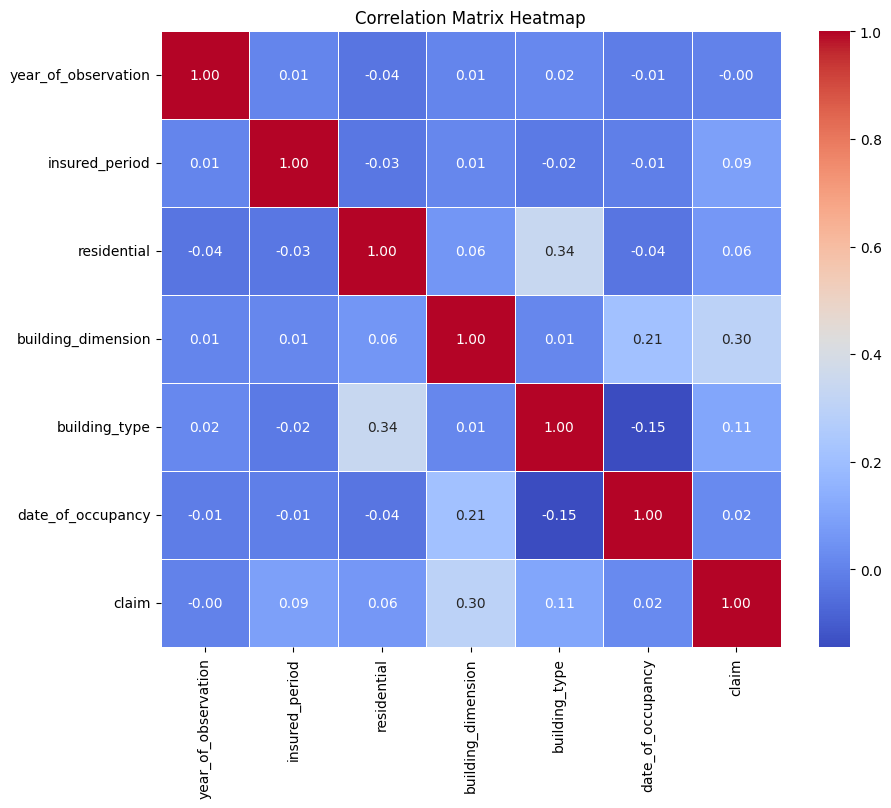

In [123]:
# Step 1: Compute the correlation matrix
correlation_matrix = train_data.corr()

#print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Part 2:  MODELING: 

- **Logistic Regression:** linear model that predicts the probability of a binary outcome
    - Linearly separable data: Logistic regression performs well when the data is linearly separable
    - The relationship between the features and target is likely linear

- **Support Vector Machine (SVM):** is a powerful classification algorithm that aims to find the hyperplane that maximizes the margin between two classes.
    - It can handle both linear and non-linear relationships.
    - Feature scaling: is necessary before applying the model.
    - Class imbalance: is necessary to fix class imbalance before apply SMV model.

- **Random Forest:** is an ensemble learning algorithm that builds multiple decision trees and aggregates their predictions.
    - Random Forest can model complex, non-linear decision boundaries.
    - Feature importance: Random Forest provides a way to measure feature importance.
    - Handling missing data: Random Forest can handle missing data in the input features and can also deal with categorical features directly.
    - Imbalanced data: Random Forest can be sensitive to class imbalances

- **DecisionTree:** DT algorithm can be effectively used for a binary classification task
    - Decision Trees are non-linear models that can capture complex relationships between features and the target variable.
    - Decision Trees are well-suited for binary-classification problem, as they can iteratively split the data until each node corresponds to a specific class.
    - No Need for Feature Scaling.
    - Handling Missing Values: Decision Trees can handle missing values relatively well by splitting based on available information.

### 1. Spliting Dataset

- Splits the Training dataset into training and validation sets using the train_test_split

In [125]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4893 entries, 2925 to 860
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          4893 non-null   object 
 1   year_of_observation  4893 non-null   int64  
 2   insured_period       4893 non-null   float64
 3   residential          4893 non-null   int64  
 4   building_painted     4893 non-null   object 
 5   building_fenced      4893 non-null   object 
 6   garden               4889 non-null   object 
 7   settlement           4893 non-null   object 
 8   building_dimension   4809 non-null   float64
 9   building_type        4893 non-null   int64  
 10  date_of_occupancy    4520 non-null   float64
 11  number_of_windows    4893 non-null   object 
 12  geo_code             4813 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 535.2+ KB


In [124]:
# Split the data into training and validation sets
drop_columns = ['claim', 'customer_id', 'geo_code', 'building_painted', 'building_fenced', 'garden', 'settlement', 'number_of_windows']
X = train_data.drop(columns=['claim'])
y = train_data['claim']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Baseline Model 

- **Pipline:**
    - Impute Missing: use K-Nearest Neighbors (KNN) Imputation, and imputing the missing values using the mean or median of the neighbors
    - Data Normalize: 
    - Use SVM model as baseline model. 
    
- **Cross-Validation:** 
    - sdsdsd

In [138]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.svm import SVC

# Initialize and train Logistic Regression
#baseline_model = LogisticRegression(class_weight='balanced')
baseline_pipline = Pipeline([
    ('impute_missing', KNNImputer(n_neighbors=2)),
    ('scaller', StandardScaler()),
    ('model', SVC(class_weight='balanced', probability=True))
])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(baseline_pipline, X_train[['building_dimension','building_type', 'residential']], y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))
# baseline_model.fit(X_train, y_train)

# Make predictions on the validation set
#y_pred_proba = baseline_model.predict_proba(X_val)[:, 1]

# Calculate AUC-ROC
#auc_baseline = roc_auc_score(y_val, y_pred_proba)
#print(f'Baseline Model AUC-ROC: {auc_baseline:.4f}')

Mean ROC AUC: 0.704


- Evaluate Model

In [139]:
# Fit the pipeline on the entire training data
baseline_pipline.fit(X_train[['building_dimension', 'building_type']], y_train)

# Predict probabilities on the test data
base_pred_proba = baseline_pipline.predict_proba(X_val[['building_dimension', 'building_type']])[:, 1]

# Evaluate the model using ROC AUC score
roc_auc = roc_auc_score(y_val, base_pred_proba)
print('Test ROC AUC: %.3f' % roc_auc) 

AttributeError: predict_proba is not available when  probability=False

### 3. Improved Model

In [134]:

improved_pipline = Pipeline([
    ('impute_missing', KNNImputer(n_neighbors=2)),
    ('scaller', StandardScaler()),
    ('model', RandomForestClassifier(class_weight='balanced'))
])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
scores = cross_val_score(improved_pipline, X_train[['building_dimension','building_type']], y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

# Initialize and train Random Forest
#improved_model = RandomForestClassifier(n_estimators=100, random_state=42)
#improved_model.fit(X_train[['building_dimension','building_type', 'residential']], y_train)

# Make predictions on the validation set
#y_pred_proba_improved = improved_model.predict_proba(X_val[['building_dimension','building_type']])[:, 1]

# Calculate AUC-ROC
#auc_improved = roc_auc_score(y_val, y_pred_proba_improved)
#print(f'Improved Model AUC-ROC: {auc_improved:.4f}')"""

Mean ROC AUC: 0.602


- Model Selection

In [137]:
# Fit the pipeline on the entire training data
improved_pipline.fit(X_train[['building_dimension', 'building_type']], y_train)

# Predict probabilities on the test data
improve_pred_proba = improved_pipline.predict_proba(X_val[['building_dimension', 'building_type']])[:, 1]

# Evaluate the model using ROC AUC score
roc_auc = roc_auc_score(y_val, improve_pred_proba)
print('Test ROC AUC: %.3f' % roc_auc)

Test ROC AUC: 0.586
